# **Importing Libraries:**
---

In [39]:
# Libraries for Data Manipulation
import numpy as np
import pandas as pd


# Libraries for Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt


# Libraries to Handle Warnings
import warnings
warnings.filterwarnings('ignore')


# Libraries to Handle Machine Learning Models
import joblib
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


# Model Evaluation Metrics
from sklearn.metrics import (
    f1_score,
    recall_score,
    roc_auc_score,
    accuracy_score,
    precision_score,
    confusion_matrix,
    classification_report,
)

# **Loading data**
---

In [40]:
x_train_scaled = pd.read_csv('./DATASET/EDA-DATASET/x_train_scaled.csv')
x_test_scaled = pd.read_csv('./DATASET/EDA-DATASET/x_test_scaled.csv')
y_train = pd.read_csv('./DATASET/EDA-DATASET/y_train.csv')
y_test = pd.read_csv('./DATASET/EDA-DATASET/y_test.csv')

# **Function to evaluate model**
---

In [41]:
def evaluate_model(y_test, y_pred, y_prob):
    accuracy = accuracy_score(
        y_test, 
        y_pred
    )
    
    precision = precision_score(
        y_test, 
        y_pred, 
        average='weighted'
    )
    
    recall = recall_score(
        y_test, 
        y_pred, 
        average='weighted'
    ) 
    
    f1 = f1_score(
        y_test, 
        y_pred, 
        average='weighted'
    ) 
    
    conf_matrix = confusion_matrix(
        y_test, 
        y_pred
    ) 
    
    class_report = classification_report(
        y_test, 
        y_pred
    ) 
    
    roc_auc = roc_auc_score(
        y_test, 
        y_prob, 
        multi_class='ovr', 
        average='weighted'
    )
    
     
    
    return accuracy, precision, recall, f1, conf_matrix, class_report, roc_auc

# **Hyper-Parameter Tuning Setups**
-----

# **Defining the Parameter grid for Decision Tree**
---

In [42]:
param_grid_dt = {
    # 'max_depth': Maximum depth of the tree: None will grow the tree until all leaves are pure, 
    # 10 can limit the tree depth to prevent overfitting.
    'max_depth': [None, 10],
    
    # 'min_samples_split': The minimum number of samples required to split an internal node.
    'min_samples_split': [2, 10],
    
    # 'min_samples_leaf': The minimum number of samples required to be at a leaf node.
    'min_samples_leaf': [1, 5],
    
    # 'criterion': The function to measure the quality of a split.
    # 'gini' is the default, but we can also use 'entropy' which is another commonly used metric.
    'criterion': ['gini', 'entropy']
}

# **Performing the GridSearchCV for Decision Tree**
----

In [43]:
grid_search_dt = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),  # DecisionTreeClassifier as the model with a fixed random state for reproducibility
    param_grid=param_grid_dt,                           # Parameter grid defined earlier for Decision Tree
    cv=5,                                               # 5-fold cross-validation to split the training data for evaluation
    scoring='f1_weighted',                              # f1_weighted as the evaluation metric
    verbose=1,                                          # Set verbosity level to show progress of the grid search
    n_jobs=-1                                           # Using all available CPU cores to parallelize the computation
)


# Fitting the grid search to find the best hyperparameters
grid_search_dt.fit(x_train_scaled, y_train)



# Saving the best Decision Tree model with optimal hyperparameters
best_dt_model = grid_search_dt.best_estimator_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


# **Running Predictions and Evaluation**
---

- **Predicting the class labels and probabilities using Decision Tree model**

In [44]:
# Class labels
y_pred_dt = best_dt_model.predict(x_test_scaled)  

# Class probabilities
y_prob_dt = best_dt_model.predict_proba(x_test_scaled)  

# Evaluate the Decision Tree model using various metrics
accuracy_dt, precision_dt, recall_dt, f1_dt, conf_matrix_dt, class_report_dt, roc_auc_dt = evaluate_model(y_test, y_pred_dt, y_prob_dt)

# **Confusion Matrix**
---

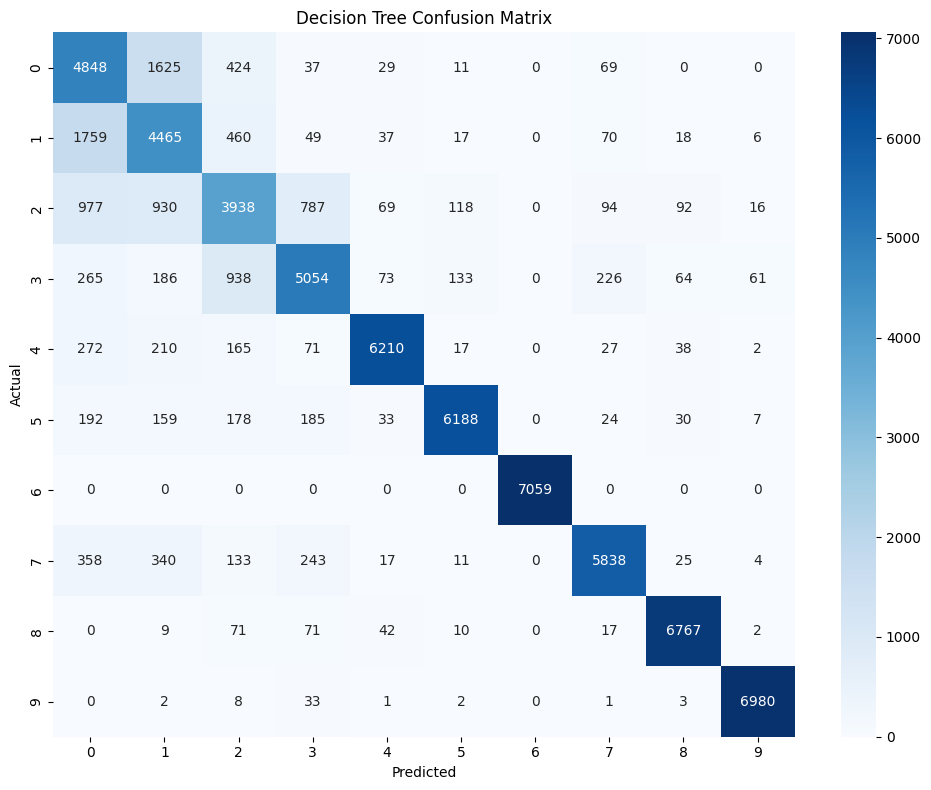

In [45]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(
    conf_matrix_dt,
    annot=True,
    fmt='d',
    cmap='Blues',
    ax=ax
)

ax.set_title('Decision Tree Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')


plt.tight_layout()
plt.show()

# **ROC-AUC Curves**
----

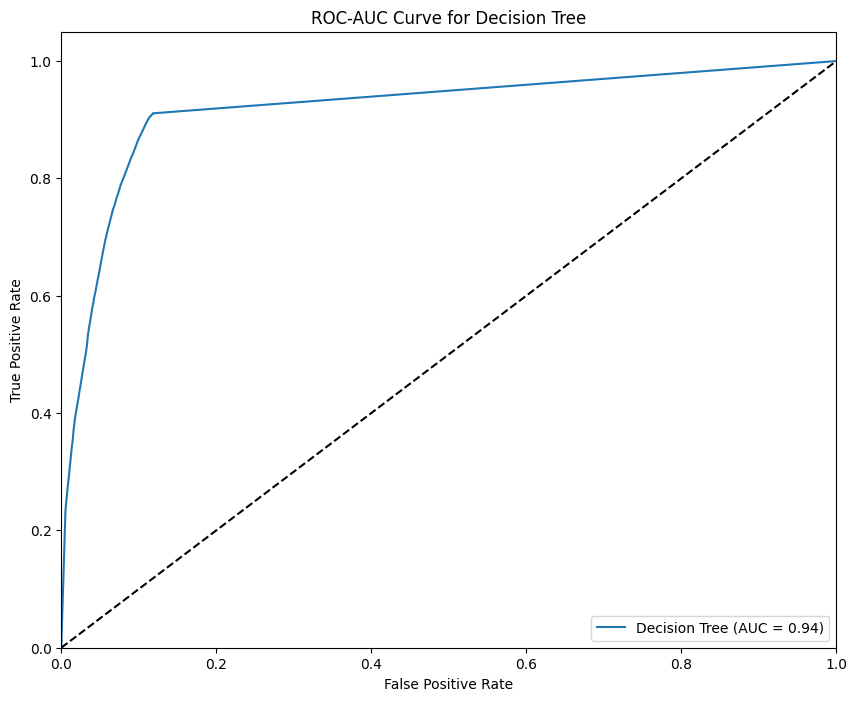

In [46]:
plt.figure(figsize=(10, 8))

fpr_dt, tpr_dt, _ = roc_curve(
    y_test,
    y_prob_dt[:, 1],
    pos_label=1
)

# Plot ROC curve for Decision Tree
plt.plot(
    fpr_dt,
    tpr_dt,
    label='Decision Tree (AUC = {:.2f})'.format(roc_auc_dt)
)

# Plot a diagonal line representing random classifier (AUC = 0.5)
plt.plot([0, 1], [0, 1], 'k--')  

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve for Decision Tree')

plt.legend(loc='lower right')

plt.show()

# **Model Summary Table**
----

In [47]:
summary_dt = pd.DataFrame({
    'Model': ['Decision Tree'],
    'Accuracy': [accuracy_dt],
    'Precision': [precision_dt],
    'Recall': [recall_dt],
    'F1 Score': [f1_dt],
    'ROC-AUC': [roc_auc_dt]
})

In [48]:
print("Decision Tree Model Summary:\n")

print(summary_dt)

Decision Tree Model Summary:

           Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0  Decision Tree  0.819243    0.82935  0.819243  0.822642  0.941249


# **Saving the best model:**
---

In [49]:
joblib.dump(best_dt_model, '03_DecisionTreeModel.pkl')

['03_DecisionTreeModel.pkl']

# **Key Inferences for Decision Tree:**
---

## **Decision Tree Model Summary**

### **Performance Comparison Across Different Configurations**

| **CV** | **Scoring**       | **Accuracy** | **Precision** | **Recall** | **F1 Score** | **ROC-AUC** | **Comments**                             |
|--------|--------------------|--------------|---------------|------------|--------------|-------------|------------------------------------------|
| 2      | `accuracy`         | 0.811457     | 0.821102      | 0.811457   | 0.814953     | 0.944709    | Good performance; less robust validation |
| 5      | `accuracy`         | 0.819        | 0.828575      | 0.819      | 0.822362     | 0.930271    | Balanced performance; robust validation  |
| 2      | `f1`               | 0.532029     | 0.705066      | 0.532029   | 0.473365     | 0.860402    | Poor results; insufficient validation    |
| 5      | `f1`               | 0.812714     | 0.819673      | 0.812714   | 0.815352     | 0.903333    | Improved; comparable to `accuracy`       |
| **5**  | **`f1_weighted`**  | **0.819243** | **0.829350**  | **0.819243** | **0.822642** | **0.941249** | **Best choice for multiclass datasets**  |

---

### **Outcome**

- **Preferred Configuration:**  
  **CV = 5** with **`scoring = 'f1_weighted'`**.  
  - This configuration balances precision, recall, and F1-score, ensuring good performance across all classes, even for imbalanced data.
  - It achieves the highest F1-score (0.822642) and maintains competitive ROC-AUC (0.941249).
